# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to be the only drug regimens that had a noticeable impact on the average tumor volume in the mice. These regimens had the smallest average tumor volume and the smallest statistical error in their data.

- For mice in the Capomulin regimen there is a strong correlation between the weight of the mice and the volume of the tumors on the mice. Further study may be needed to take the size of the mice into account when determining the effectiveness of the drug regimens

- Capomulin and Ramicane were the most studied drugs, with the most mice and the most timepoints measured.

- Just over half of the mice studied were male. Further analysis is needed to determine if there is any correlation between the effectiveness of the drug regimens and the sex of the mice.

- Almost all final tumor volume measurements fell within statistically expected ranges based on the data, with one exception. That mouse may need further study to determine what other factors may have contributed to a smaller than expected tumor on one of the ostensibly less effective drug regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(mouse_study_merge["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_merge[mouse_study_merge.duplicated(subset=("Mouse ID","Timepoint"))]
duplicate_mouse = duplicate["Mouse ID"].reset_index(drop=True)
duplicate_mouse[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == duplicate_mouse[0],:]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] != duplicate_mouse[0]]
clean_data.reset_index(drop=True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_by_drug = clean_data.groupby("Drug Regimen")

drug_mean_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].mean()
drug_median_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].median()
drug_var_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].var()
drug_std_dev_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].std()
drug_sem_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].sem()

drug_stats_df = pd.DataFrame(
    {"Mean Tumor Volume":      drug_mean_tumor_volume,
     "Median Tumor Volume":    drug_median_tumor_volume,
     "Tumor Volume Variance":  drug_var_tumor_volume,
     "Tumor Volume Std. Dev.": drug_std_dev_tumor_volume,
     "Tumor Volume Std. Err.": drug_sem_tumor_volume
    },
)
drug_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
drug_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints Tested')

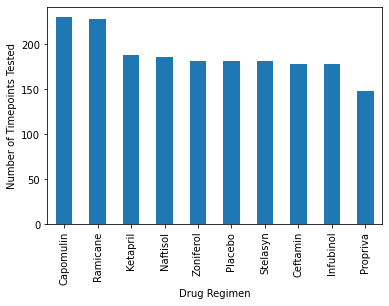

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
test_count_per_drug = clean_data.groupby("Drug Regimen")[["Timepoint"]].count().sort_values("Timepoint", ascending=False)

test_count_per_drug.plot(kind="bar", legend="")
plt.ylabel("Number of Timepoints Tested")

Text(0, 0.5, 'Number of Timepoints Tested')

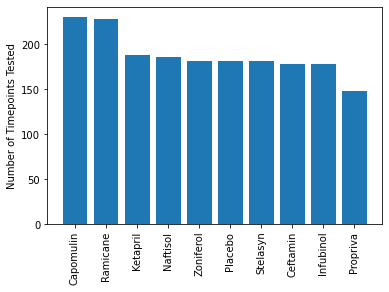

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
test_count_per_drug = clean_data.groupby("Drug Regimen")[["Timepoint"]].count().sort_values("Timepoint", ascending=False).reset_index()
x_axis = np.arange(len(test_count_per_drug))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, test_count_per_drug["Timepoint"], align="center")
plt.xticks(tick_locations, test_count_per_drug["Drug Regimen"], rotation=90)
plt.ylabel("Number of Timepoints Tested")

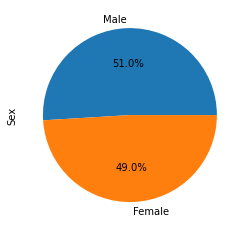

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_data["Sex"].value_counts()
sex_counts.plot.pie(autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

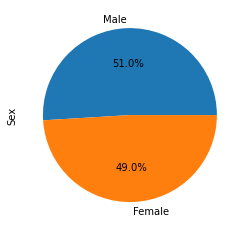

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = sex_counts
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = clean_data.groupby("Mouse ID")[["Timepoint"]].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(last_time_df, clean_data, on=("Mouse ID","Timepoint"), how="left")
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"] == drug]

    # Create subset
    tumor_volume[drug] = filtered_df["Tumor Volume (mm3)"].tolist()

    # Determine outliers using upper and lower bounds
    quartiles = filtered_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [x for x in tumor_volume[drug] if (x < lower_bound or x > upper_bound)]
    
    print(drug + "'s potential outliers: " + str(outliers))
    

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Ceftamin's potential outliers: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

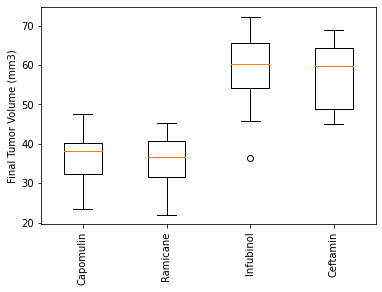

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels, data = tumor_volume.keys(), tumor_volume.values()
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse r944')

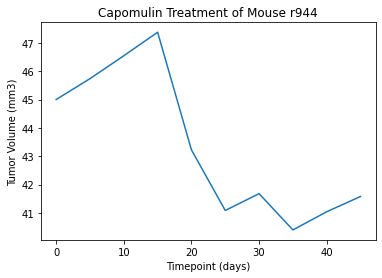

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Mouse ID"] == "r944", :]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse r944")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

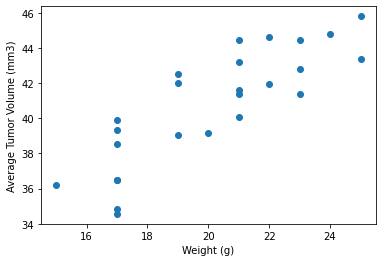

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()
plt.scatter(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between average mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

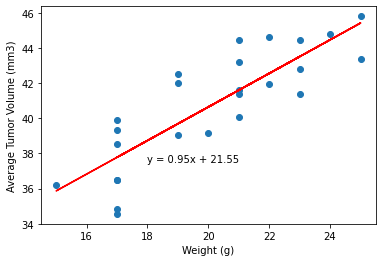

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])
print("The correlation between average mouse weight and the average tumor volume is %.2f" % correlation[0])

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])
regress_values = capomulin_mice["Weight (g)"] * slope + intercept
line_eq = "y = %.2fx + %.2f" % (slope, intercept)
plt.scatter(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])
plt.plot(capomulin_mice["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (18,37.5))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")